In [46]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('data/heart.zip')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [48]:
df['old'] = df['age'].apply(lambda x: 1 if x > 60 else 0)
df['old'].sum()

79

In [49]:
def set_trestbps(i, age, sex):
    pres = {20:[116,123], 30: [120,126], 40: [127, 129], 50: [137, 135], 60: [144,142], 61: [159, 142]}
    if age <= 20:
        df.loc[i, 'trestbps_mean'] = pres[20][sex]
    elif 20 < age and age <=30:
        df.loc[i, 'trestbps_mean'] = pres[30][sex]
    elif 30 < age and age <=40:
        df.loc[i, 'trestbps_mean'] = pres[40][sex]
    elif 40 < age and age <=50:
        df.loc[i, 'trestbps_mean'] = pres[50][sex]
    elif 50 < age and age <=60:
        df.loc[i, 'trestbps_mean'] = pres[60][sex]
    elif age >= 61:
        df.loc[i, 'trestbps_mean'] = pres[61][sex]
        
             
for i in df.index:
    set_trestbps(i, df.loc[i, 'age'], df.loc[i, 'sex'])

In [50]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df[['cp', 'restecg', 'slope', 'ca', 'thal']])
df = pd.concat([df, type_bin], axis=1)
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0


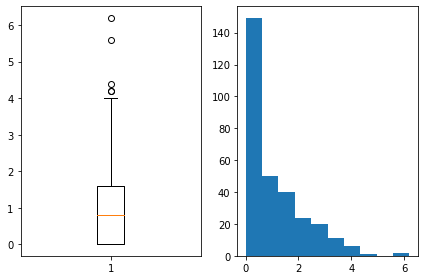

In [51]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
plt.boxplot(df['oldpeak'])
plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['oldpeak']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

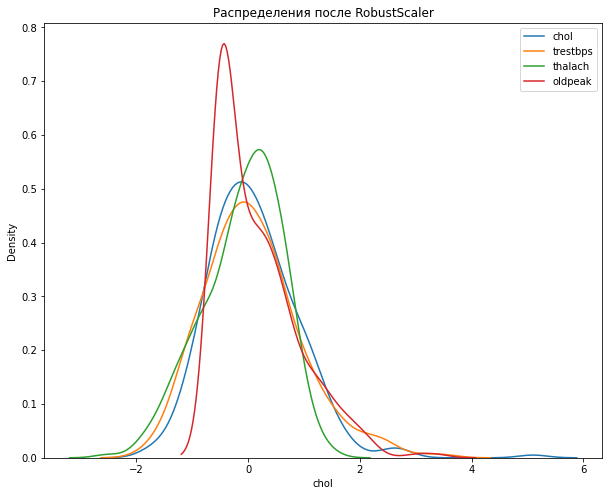

In [52]:
r_scaler = preprocessing.RobustScaler()

df[['chol', 'trestbps', 'thalach', 'oldpeak']] = r_scaler.fit_transform(df[['chol', 'trestbps', 'thalach', 'oldpeak']])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df['chol'], ax=ax1, label='chol')
sns.kdeplot(df['trestbps'], ax=ax1, label='trestbps')
sns.kdeplot(df['thalach'], ax=ax1, label='thalach')
sns.kdeplot(df['oldpeak'], ax=ax1, label='oldpeak')
plt.legend()


In [53]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,0.081188,0.098646,0.148515,0.528053,-0.103173,0.326733,0.149752,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,1.032052,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,0.000000,-1.800000,-1.795276,0.000000,0.000000,-2.523077,0.000000,-0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,-0.500000,-0.456693,0.000000,0.000000,-0.600000,0.000000,-0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,0.500000,0.543307,0.000000,1.000000,0.400000,1.000000,0.500000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,3.500000,5.102362,1.000000,2.000000,1.507692,1.000000,3.375000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

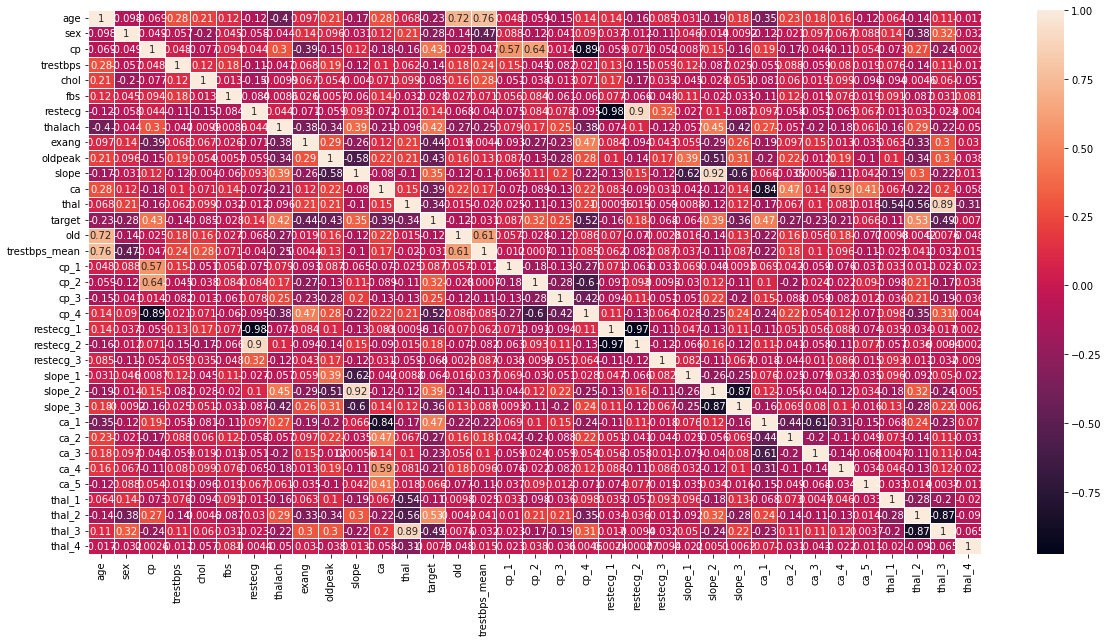

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)